In [1]:
from textblob import TextBlob
import pandas as pd  
import numpy as np
from decimal import Decimal

In [3]:
df=pd.read_csv("/home/bruno/Documents/artigo/R/Dilma_oplexiconLimpo.txt",delimiter="\t",encoding='latin-1')



In [31]:
dilma1turno = dilma1turno[dilma1turno['text'].notnull()]

In [32]:
dilma1turno

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,score,sentiment.x,comment_id,sentiment.y,data,sentimento
0,RaulDudek,05/10/2014 19:59,0,0,geraldo alckmin reeleito governador sao paulo ...,NaN,NaN,#AECIOdeVirada,"5,19E+17",https://twitter.com/RaulDudek/status/518898425...,-0.1,negativo,1,2.0,5-10-20,positivo
1,RNemitz,05/10/2014 19:59,0,2,dilma rousseff pt aecio neves psdb vao disputa...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/RNemitz/status/51889842442...,0.0,neutro,3,-1.0,5-10-20,negativo
2,potterhalder,05/10/2014 19:59,1,0,voces idolatrando aecio minimo nao sabem nada ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/potterhalder/status/518898...,-0.3,negativo,6,0.0,5-10-20,neutro
3,crazyalicew,05/10/2014 19:59,0,1,coisa nordestino votar dilma so causa bolsa fa...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/crazyalicew/status/5188984...,0.1,positivo,10,0.0,5-10-20,neutro
4,gabiscoelho_,05/10/2014 19:59,0,0,unica coisa n queria alckmin governador dilma ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/gabiscoelho_/status/518898...,0.0,neutro,14,1.0,5-10-20,positivo
5,Darlinglax_,05/10/2014 19:59,1,1,aaaargh odio desse povo brasileiro faz protest...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/Darlinglax_/status/5188984...,-0.7,negativo,16,-1.0,5-10-20,negativo
6,BeatriceZaretti,05/10/2014 19:59,0,0,toma porra to revoltada pais retardado q vota ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/BeatriceZaretti/status/518...,-0.7,negativo,22,1.0,5-10-20,positivo
7,maathlinhares,05/10/2014 19:59,0,0,dilma pegou pais ja estabilizado sistema pt an...,NaN,@MathShadows @douradocarvalho,NaN,"5,19E+17",https://twitter.com/maathlinhares/status/51889...,0.43333333333333335,positivo,25,1.0,5-10-20,positivo
8,AninhaBlockPop,05/10/2014 19:59,0,0,verdade vamos ver marina outros vao apoiar dil...,NaN,@IzaNina_,NaN,"5,19E+17",https://twitter.com/AninhaBlockPop/status/5188...,0.0,neutro,30,0.0,5-10-20,neutro
9,Pauleraa_,05/10/2014 19:59,0,0,dilma aecio segundo turno voces sao otarios,NaN,NaN,NaN,"5,19E+17",https://twitter.com/Pauleraa_/status/518898418...,0.0,neutro,32,1.0,5-10-20,positivo


In [16]:
aecio1turno=pd.read_csv("Classificado/clasaecio1.txt",delimiter="\t",encoding='latin-1')
aecio2turno=pd.read_csv("Classificado/clasaecio2.txt",delimiter="\t",encoding='latin-1')

In [33]:
dilma1turno.to_csv('/home/bruno/Documents/artigo/R/Dilma_oplexiconLimpo.txt',sep='\t', mode='a',index=False)


In [19]:
def analyze_sentiment(score):
    if score == '5-10-20':
        return
    score = float(score)
    if score > 0:
        return 'positivo'
    elif score == 0:
        return 'neutro'
    else: 
        return 'negativo'

d1 = []
for tweet in dilma1turno['score']:
    d1.append(analyze_sentiment(tweet))



In [21]:
dilma1turno['sentiment.x'] = d1

In [25]:
pos_tweets = [ tweet for index, tweet in enumerate(dilma1turno['sentiment.x']) if dilma1turno['sentiment.x'][index] == 'positivo']
neu_tweets = [ tweet for index, tweet in enumerate(dilma1turno['sentiment.x']) if dilma1turno['sentiment.x'][index] == 'neutro']
neg_tweets = [ tweet for index, tweet in enumerate(dilma1turno['sentiment.x']) if dilma1turno['sentiment.x'][index] == 'negativo']



print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(dilma1turno['sentiment.x'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(dilma1turno['sentiment.x'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(dilma1turno['sentiment.x'])))

Percentage of positive tweets: 42.672451961392014%
Percentage of neutral tweets: 24.01044895067741%
Percentage de negative tweets: 33.27282387319578%


In [22]:
pos_tweets = []
neg_tweets = []
neu_tweets = []
for tweet in dilma1turno['sentimento']:
    if tweet == 'positivo':
        pos_tweets.append(tweet)
    elif tweet == 'negativo':
        neg_tweets.append(tweet)
    else:
        neu_tweets.append(tweet)



In [23]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(dilma1turno['sentimento'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(dilma1turno['sentimento'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(dilma1turno['sentimento'])))

Percentage of positive tweets: 25.123970601257415%
Percentage of neutral tweets: 26.518639865403347%
Percentage de negative tweets: 48.35738953333924%


In [29]:
lenG = pd.Series(dilma1turno['text'])

In [30]:
dilma1turno['len'] = lenG.str.len()

In [31]:
tlen = pd.Series(data=dilma1turno['len'].values, index=dilma1turno['date'])
tfav = pd.Series(data=dilma1turno['favorites'].values, index=dilma1turno['date'])
tret = pd.Series(data=dilma1turno['retweets'].values, index=dilma1turno['date'])

In [32]:
dilma1turno.to_csv('Dados Treinamento/clasdilma1.txt',sep='\t', mode='a',index=False)

In [33]:
fav_max = np.max(dilma1turno['favorites'])
rt_max  = np.max(dilma1turno['retweets'])

fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]1kkfav = dilma1turno[dilma1turno.1fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]
fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]
fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]
fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]
fav = dilma1turno[dilma1turno.favorites == fav_max].index[0]
favorites == fav_max].index[0]

rt  = dilma1turno[dilma1turno.retweets == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(dilma1turno['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(dilma1turno['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(dilma1turno['text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(dilma1turno['len'][rt]))

The tweet with more likes is: 
porra  vcs estao vendo o resultado  aecio   atras da dilma   memorizem isso pra nao se guiar mais por pesquisa   tudo mentira 
Number of likes: 2261
126 characters.

The tweet with more retweets is: 
tudo isso pra chegar hoje e votar na dilma .. pic.twitter.com/uqocsna
Number of retweets: 4140
69 characters.



In [ ]:
a1 = []
for tweet in aecio1turno['score']:
    a1.append(analyze_sentiment(tweet))
    
aecio1turno['sentiment'] = a1
aecio1turno.to_csv('Dados Treinamento/clasAecio1.txt',sep='\t', mode='a',index=False)
aecio1turno=pd.read_csv("Dados Treinamento/clasAecio1.txt",delimiter="\t",encoding='latin-1')

pos_tweets = [ tweet for index, tweet in enumerate(aecio1turno['sentiment']) if aecio1turno['sentiment'][index] == 'positivo']
neu_tweets = [ tweet for index, tweet in enumerate(aecio1turno['sentiment']) if aecio1turno['sentiment'][index] == 'neutro']
neg_tweets = [ tweet for index, tweet in enumerate(aecio1turno['sentiment']) if aecio1turno['sentiment'][index] == 'negativo']

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(aecio1turno['sentiment'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(aecio1turno['sentiment'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(aecio1turno['sentiment'])))


In [ ]:
a2 = []
for tweet in aecio2turno['score']:
    a2.append(analyze_sentiment(tweet))
    
aecio2turno['sentiment'] = a2
aecio2turno.to_csv('Dados Treinamento/clasAecio2.txt',sep='\t', mode='a',index=False)
aecio2turno=pd.read_csv("Dados Treinamento/clasAecio2.txt",delimiter="\t",encoding='latin-1')

pos_tweets = [ tweet for index, tweet in enumerate(aecio2turno['sentiment']) if aecio2turno['sentiment'][index] == 'positivo']
neu_tweets = [ tweet for index, tweet in enumerate(aecio2turno['sentiment']) if aecio2turno['sentiment'][index] == 'neutro']
neg_tweets = [ tweet for index, tweet in enumerate(aecio2turno['sentiment']) if aecio2turno['sentiment'][index] == 'negativo']

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(aecio2turno['sentiment'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(aecio2turno['sentiment'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(aecio2turno['sentiment'])))

In [4]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [7]:
df

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,score,sentiment.x,comment_id,sentiment.y,data,sentimento,pre_clean_len
0,RaulDudek,05/10/2014 19:59,0,0,geraldo alckmin reeleito governador sao paulo ...,NaN,NaN,#AECIOdeVirada,"5,19E+17",https://twitter.com/RaulDudek/status/518898425...,-0.1,negativo,1,2.0,5-10-20,positivo,121
1,RNemitz,05/10/2014 19:59,0,2,dilma rousseff pt aecio neves psdb vao disputa...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/RNemitz/status/51889842442...,0.0,neutro,3,-1.0,5-10-20,negativo,53
2,potterhalder,05/10/2014 19:59,1,0,voces idolatrando aecio minimo nao sabem nada ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/potterhalder/status/518898...,-0.3,negativo,6,0.0,5-10-20,neutro,101
3,crazyalicew,05/10/2014 19:59,0,1,coisa nordestino votar dilma so causa bolsa fa...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/crazyalicew/status/5188984...,0.1,positivo,10,0.0,5-10-20,neutro,109
4,gabiscoelho_,05/10/2014 19:59,0,0,unica coisa n queria alckmin governador dilma ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/gabiscoelho_/status/518898...,0.0,neutro,14,1.0,5-10-20,positivo,52
5,Darlinglax_,05/10/2014 19:59,1,1,aaaargh odio desse povo brasileiro faz protest...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/Darlinglax_/status/5188984...,-0.7,negativo,16,-1.0,5-10-20,negativo,94
6,BeatriceZaretti,05/10/2014 19:59,0,0,toma porra to revoltada pais retardado q vota ...,NaN,NaN,NaN,"5,19E+17",https://twitter.com/BeatriceZaretti/status/518...,-0.7,negativo,22,1.0,5-10-20,positivo,58
7,maathlinhares,05/10/2014 19:59,0,0,dilma pegou pais ja estabilizado sistema pt an...,NaN,@MathShadows @douradocarvalho,NaN,"5,19E+17",https://twitter.com/maathlinhares/status/51889...,0.43333333333333335,positivo,25,1.0,5-10-20,positivo,70
8,AninhaBlockPop,05/10/2014 19:59,0,0,verdade vamos ver marina outros vao apoiar dil...,NaN,@IzaNina_,NaN,"5,19E+17",https://twitter.com/AninhaBlockPop/status/5188...,0.0,neutro,30,0.0,5-10-20,neutro,81
9,Pauleraa_,05/10/2014 19:59,0,0,dilma aecio segundo turno voces sao otarios,NaN,NaN,NaN,"5,19E+17",https://twitter.com/Pauleraa_/status/518898418...,0.0,neutro,32,1.0,5-10-20,positivo,43


In [9]:

from pprint import pprint
data_dict = {
    'sentimento':{
        'type':df.sentimento.dtype,
        'description':'sentiment class - 0:negativo, 1:positivo'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

In [10]:
pprint(data_dict)

{'dataset_shape': (45067, 17),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentimento': {'description': 'sentiment class - 0:negativo, 1:positivo',
                'type': dtype('O')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

<Figure size 500x500 with 1 Axes>

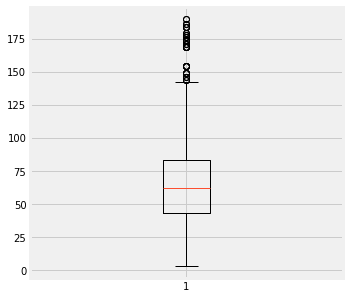

In [13]:

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()